In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from typing import List, Tuple

In [2]:
def plot_data_piechart(data: pd.DataFrame, col_name: str)->None:
    """plot a pie chart of the given column"""
    #data.groupby([col_name]).sum().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90)
    data[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(12,12), title='Manufacturer', ylabel='Manufacturer')

def plot_data_hist(data: pd.DataFrame, col_name: str, bins_count: int = 1000)->None:
    """plot a histogram of the given column"""
    data.hist(column=col_name, bins=bins_count)

def plot_data_stacked_hist(list: List[List[int]], labels: List[str], colors: str, col_1: str, col_2: str, bins_count: int = 60)->None:
    """plot a stacked histogram of the given column"""
    plt.hist(list, bins=bins_count, stacked=True, density=True, color=colors, label=labels, histtype='barstacked')
    # Plot formatting
    plt.legend()
    plt.xlabel(col_2)
    plt.ylabel(col_1)
    plt.title(f'Side-by-Side Histogram between {col_1} and {col_2}')

def plot_data_boxplot(data: pd.DataFrame, col_name: str)->None:
    """plot a boxplot of the given column"""
    data.boxplot(column=col_name)

def plot_data_relationship(data: pd.DataFrame, col_name_1: str, col_name_2: str)->None:
    """plot a scatter plot of the given columns"""
    data.plot.scatter(x=col_name_1, y=col_name_2)

def print_meta_data(nums: List[float])->None:
    print("+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++")
    # print the min and max values
    print(f"Min: {np.min(nums)}")
    print(f"Max: {np.max(nums)}")
    # print the mean and median values
    print(f"Mean: {np.mean(nums)}")
    print(f"Median: {np.median(nums)}")
    # print the standard deviation
    print(f"Standard Deviation: {np.std(nums)}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

def get_outliers(nums: List[float], use_iqd: bool = False)-> Tuple[List[int], List[float]]:
    """
    Returns a list of outliers and their indexes in the given list of numbers
    """
    outlier_indecies: List[int] = []
    outlier_values: List[float] = []
    if use_iqd:
        # compute the interquartile range
        q_1: float = float(np.percentile(nums, 25))
        q_3: float = float(np.percentile(nums, 75))
        iqr: float = q_3 - q_1
        # compute the lower and upper bounds
        lower_bound: float = q_1 - (1.5 * iqr)
        upper_bound: float = q_3 + (1.5 * iqr)
        # find the outliers
        for index, num in enumerate(nums):
            if num < lower_bound or num > upper_bound:
                outlier_indecies.append(index)
                outlier_values.append(num)
    else:
        # cast to float beacuse the return type is floating[any]
        mean: float = float(np.mean(nums))
        std: float = float(np.std(nums))
        for index, num in enumerate(nums):
            z_score: float = (num - mean) / std
            if np.abs(z_score) > 3:
                outlier_indecies.append(index)
                outlier_values.append(num)
    return outlier_indecies, outlier_values

def substitute_outliers_with_mean(nums: List[float], outlier_indexes:List[int])->List[float]:
    """return a list of numbers with outliers replaced by the most frequent value"""
    mean: float = float(np.mean(nums))
    for index in outlier_indexes:
        nums[index] = mean
    return nums

def numbers_datacleaning_pipe(nums: List[float])->List[float]:
    """returns a list of numbers with outliers replaced by the mean"""
    outlier_indexes, outlier_values = get_outliers(nums)
    # if there are no outliers, return the original list
    if len(outlier_indexes) == 0:
        return nums
    else:
        return substitute_outliers_with_mean(nums, outlier_indexes)

def clean_data(data: pd.DataFrame)->pd.DataFrame:
    data['Levy'] = data['Levy'].str.replace('-', '')
    data['turbo'] = data['Engine volume'].str.contains('Turbo', regex=False)
    data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
    data['Engine volume'] = data['Engine volume'].str.replace(' ', '')
    
    
    data.drop('Doors', axis=1, inplace=True)
    data.drop('Color', axis=1, inplace=True)
    data.drop('Wheel', axis=1, inplace=True)
    
    return data

def visualize_data(data: pd.DataFrame)->None:
    """visualize the data"""
    data['turbo'].value_counts().plot.bar()
    plt.show()

    data['Category'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Manufacturer'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Engine volume'].value_counts().plot.bar()
    plt.show()

    data['Drive wheels'].value_counts().plot.bar()
    plt.show()

    data['Airbags'].value_counts().plot.bar()
    plt.show()


In [3]:
# load the dataset into pandas dataframe
df:pd.DataFrame = pd.read_csv('train.csv')
df = clean_data(df)
print(df.head())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467              HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels  Airbags  turbo  
0     Automatic          4x4       12  False  
1     Tiptronic          4x4        8  False  
2      Vari

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1
Max: 26307500
Mean: 18555.92722357956
Median: 13172.0
Standard Deviation: 190576.31611155753
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1.0
Max: 308906.0
Mean: 17113.29073045021
Median: 13172.0
Standard Deviation: 18276.756081076466
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 178.5
Max: 308906.0
Mean: 18857.837369031386
Median: 14269.0
Standard Deviation: 17407.67227533668
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


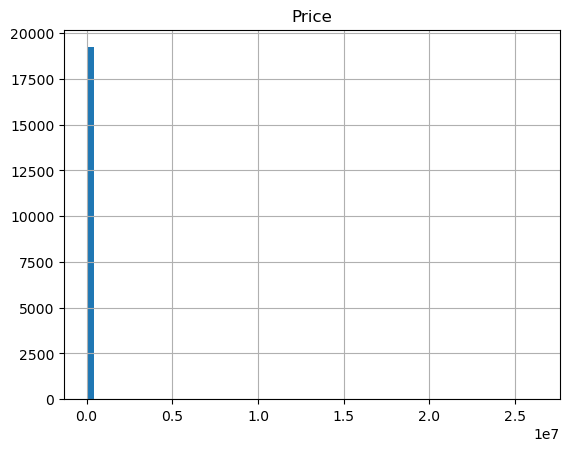

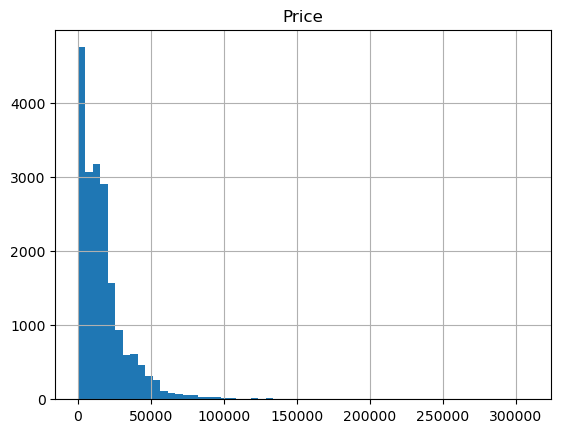

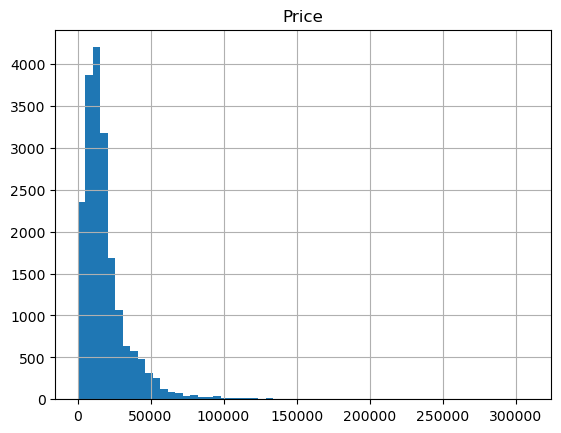

In [4]:
prices_before_cleaning: List[float] = df['Price'].values.tolist()
# print the meta data of the target variable
print_meta_data(prices_before_cleaning)
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# clean prices
prices_after_cleaning: List[float] = numbers_datacleaning_pipe(prices_before_cleaning)
# print the meta data of the target variable
print_meta_data(prices_after_cleaning)
df['Price'] = prices_after_cleaning
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# loop over all prices
prices: List[float] = df["Price"].values.tolist()
for index, price in enumerate(prices):
    # if the price is less than 2000 replace it with the average prices of the same car model
    if price < 1000:
        # get the car model
        car_model: str = df["Model"][index]
        # get the average price of the car model
        average_price: float = df[df["Model"] == car_model]["Price"].mean()
        if average_price == price:
            prices[index] = 1000
        else:
            # replace the price with the average price
            prices[index] = average_price
df["Price"] = prices
# plot the distribution of the target variable
print_meta_data(df["Price"].values.tolist())
plot_data_hist(df, "Price", 60)

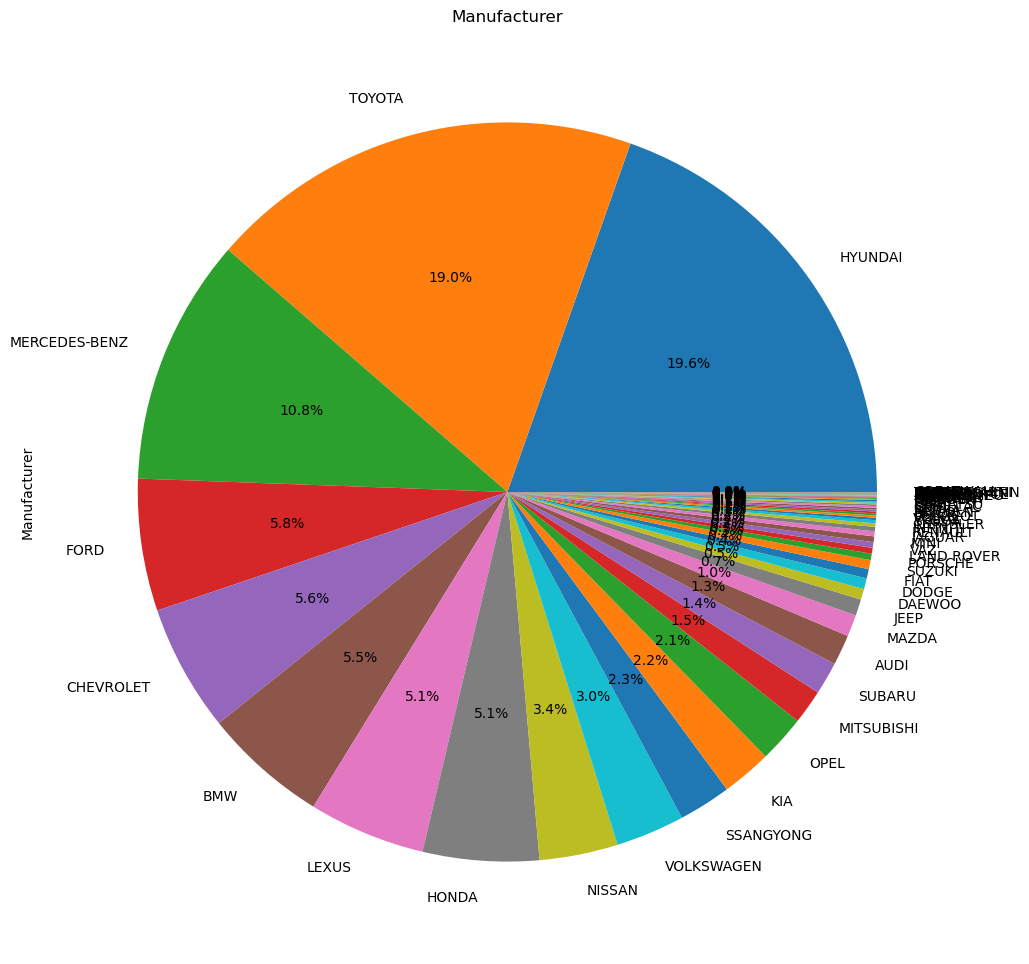

In [5]:
# plot pie char of the manufacturer
plot_data_piechart(df, 'Manufacturer')

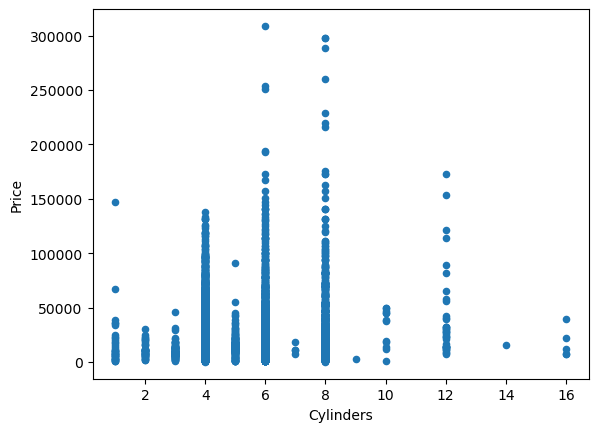

In [6]:
# plot the relationship between the price and the clinder count
plot_data_relationship(df, 'Cylinders', 'Price')

['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


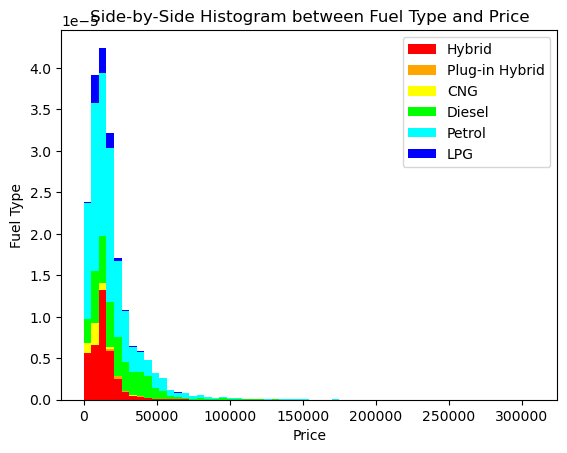

In [7]:
# print the unique values of the fuel type
print(df['Fuel type'].unique())
# Make a separate list for each Fuel type
x1 = list(df[df['Fuel type'] == 'Hybrid']['Price'])
x2 = list(df[df['Fuel type'] == 'Plug-in Hybrid']['Price'])
x3 = list(df[df['Fuel type'] == 'CNG']['Price'])
x4 = list(df[df['Fuel type'] == 'Diesel']['Price'])
x5 = list(df[df['Fuel type'] == 'Petrol']['Price'])
x6 = list(df[df['Fuel type'] == 'LPG']['Price'])
# define 6 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF']
labels = ['Hybrid', 'Plug-in Hybrid', 'CNG', 'Diesel', 'Petrol', 'LPG']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6], colors=colorls, labels=labels, col_2="Price", col_1="Fuel Type",bins_count=60)

['4x4' 'Front' 'Rear']


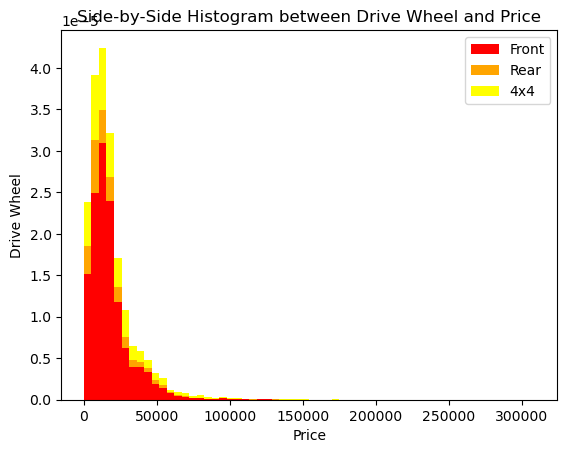

In [8]:
# print the unique values of the drive wheels
print(df['Drive wheels'].unique())
# Make a separate list for each Drive wheels
x1 = list(df[df['Drive wheels'] == 'Front']['Price'])
x2 = list(df[df['Drive wheels'] == 'Rear']['Price'])
x3 = list(df[df['Drive wheels'] == '4x4']['Price'])
# define 3 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00']
labels = ['Front', 'Rear', '4x4']
plot_data_stacked_hist(list=[x1, x2, x3], colors=colorls, col_2="Price", col_1="Drive Wheel",labels=labels, bins_count=60)

['Automatic' 'Tiptronic' 'Variator' 'Manual']


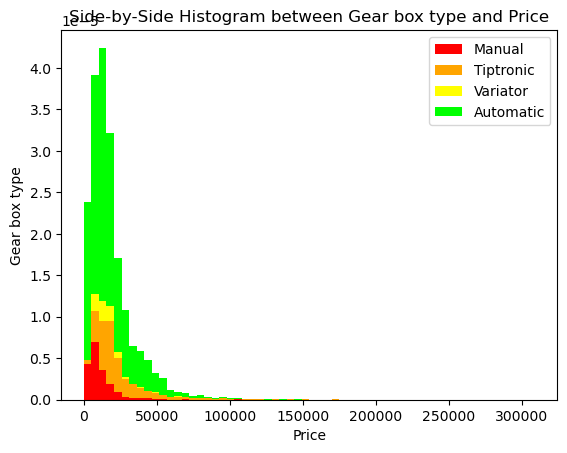

In [9]:
# print the unique values of the gear box type
print(df['Gear box type'].unique())
# Make a separate list for each Gear box type
x1 = list(df[df['Gear box type'] == 'Manual']['Price'])
x2 = list(df[df['Gear box type'] == 'Tiptronic']['Price'])
x3 = list(df[df['Gear box type'] == 'Variator']['Price'])
x4 = list(df[df['Gear box type'] == 'Automatic']['Price'])
# define 4 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00']
labels = ['Manual', 'Tiptronic', 'Variator', 'Automatic']
plot_data_stacked_hist(list=[x1, x2, x3, x4], colors=colorls, col_2="Price", col_1="Gear box type", labels=labels, bins_count=60)

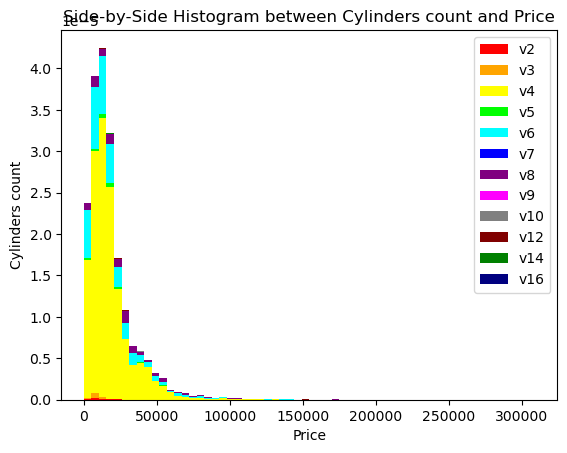

In [10]:
# Make a separate list for each Clyinders count
x1 = list(df[df['Cylinders'] == 2]['Price'])
x2 = list(df[df['Cylinders'] == 3]['Price'])
x3 = list(df[df['Cylinders'] == 4]['Price'])
x4 = list(df[df['Cylinders'] == 5]['Price'])
x5 = list(df[df['Cylinders'] == 6]['Price'])
x6 = list(df[df['Cylinders'] == 7]['Price'])
x7 = list(df[df['Cylinders'] == 8]['Price'])
x8 = list(df[df['Cylinders'] == 9]['Price'])
x9 = list(df[df['Cylinders'] == 10]['Price'])
x10 = list(df[df['Cylinders'] == 12]['Price'])
x11 = list(df[df['Cylinders'] == 14]['Price'])
x12 = list(df[df['Cylinders'] == 16]['Price'])
# define 12 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#800080', '#FF00FF', '#808080', '#800000', '#008000', '#000080']
labels = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v12', 'v14', 'v16']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], colors=colorls, col_2="Price", col_1="Cylinders count", labels=labels, bins_count=60)

In [11]:
flag : bool = True

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 2147483647.0
Mean: 1532235.68768519
Median: 126000.0
Standard Deviation: 48402611.26995821
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 111111111.0
Mean: 168230.22011635563
Median: 126000.0
Standard Deviation: 1103855.4058717757
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
min_mileage:  0.0
max_mileage:  111111111.0


(array([1.019e+03, 1.040e+02, 2.020e+02, 1.690e+02, 2.000e+02, 1.710e+02,
        2.150e+02, 2.180e+02, 2.340e+02, 2.110e+02, 2.150e+02, 2.270e+02,
        3.010e+02, 3.030e+02, 2.610e+02, 2.690e+02, 2.930e+02, 3.640e+02,
        3.060e+02, 2.910e+02, 2.870e+02, 2.470e+02, 3.380e+02, 3.190e+02,
        2.960e+02, 4.610e+02, 3.490e+02, 4.700e+02, 3.530e+02, 2.940e+02,
        4.130e+02, 3.680e+02, 3.750e+02, 3.540e+02, 3.090e+02, 3.620e+02,
        3.350e+02, 4.120e+02, 2.970e+02, 3.040e+02, 3.160e+02, 2.330e+02,
        3.150e+02, 2.530e+02, 2.090e+02, 2.820e+02, 2.360e+02, 2.800e+02,
        1.840e+02, 1.860e+02, 3.470e+02, 1.330e+02, 1.570e+02, 1.230e+02,
        1.410e+02, 1.550e+02, 1.520e+02, 1.770e+02, 1.090e+02, 9.700e+01,
        1.220e+02, 9.400e+01, 1.370e+02, 7.600e+01, 1.000e+02, 1.260e+02,
        1.160e+02, 9.700e+01, 1.470e+02, 5.700e+01, 7.900e+01, 6.500e+01,
        7.500e+01, 2.700e+01, 4.000e+01, 8.800e+01, 3.200e+01, 4.200e+01,
        6.600e+01, 7.600e+01, 5.000e+0

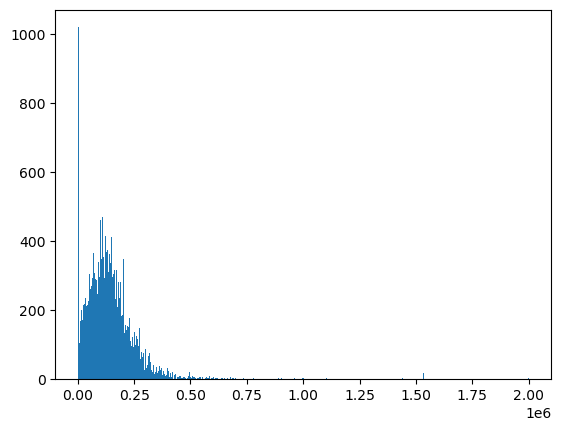

In [12]:
# remove the work km from the mileage
if flag:
    df['Mileage'] = df['Mileage'].apply(lambda x: x.split()[0])
    # convert the mileage to float
    df['Mileage'] = df['Mileage'].astype(float)
    flag = False
# remove outliers from the mileage
mileage_before_cleaning: List[float] = df["Mileage"].values.tolist()
print_meta_data(mileage_before_cleaning)
mileage_after_cleaning: List[float] = numbers_datacleaning_pipe(mileage_before_cleaning)
df['Mileage'] = mileage_after_cleaning
# plot the distribution of the mileage
print_meta_data(df["Mileage"].values.tolist())
# get the min and max values of the mileage
min_mileage: float = min(df["Mileage"].values.tolist())
max_mileage: float = max(df["Mileage"].values.tolist())
print("min_mileage: ", min_mileage)
print("max_mileage: ", max_mileage)
plt.hist(df["Mileage"].values.tolist(), range=[0, 2000000], bins=500)

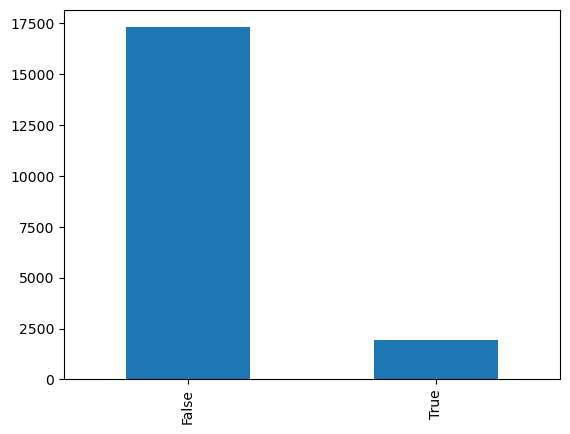

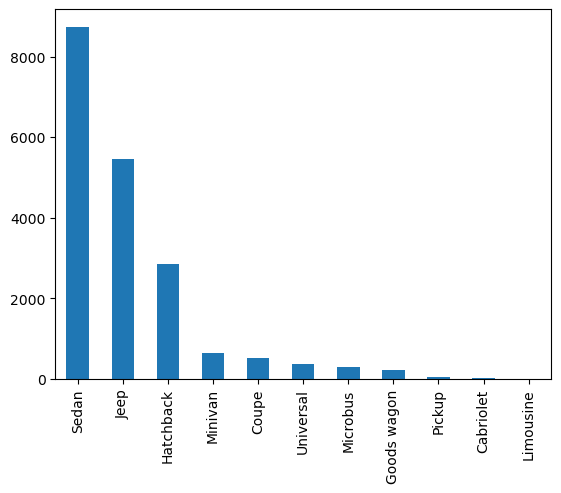

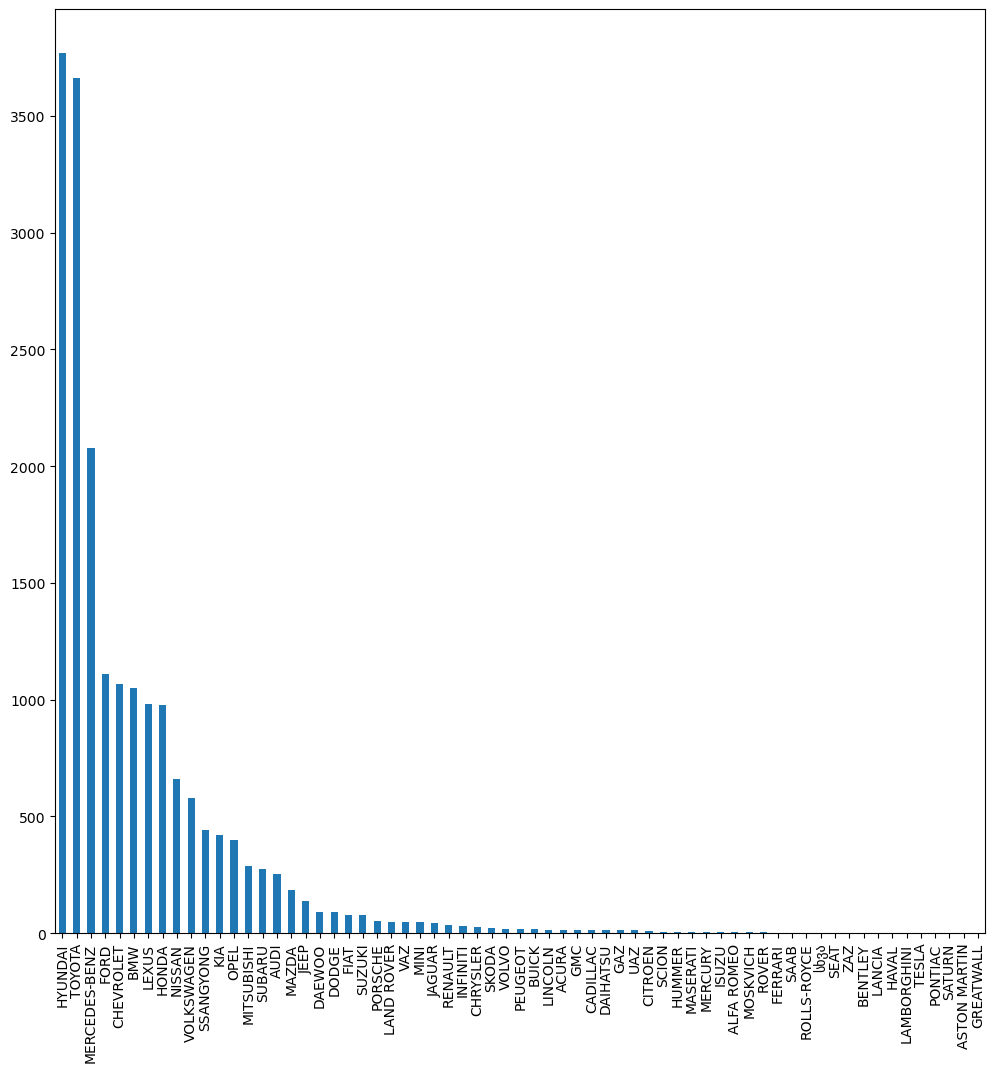

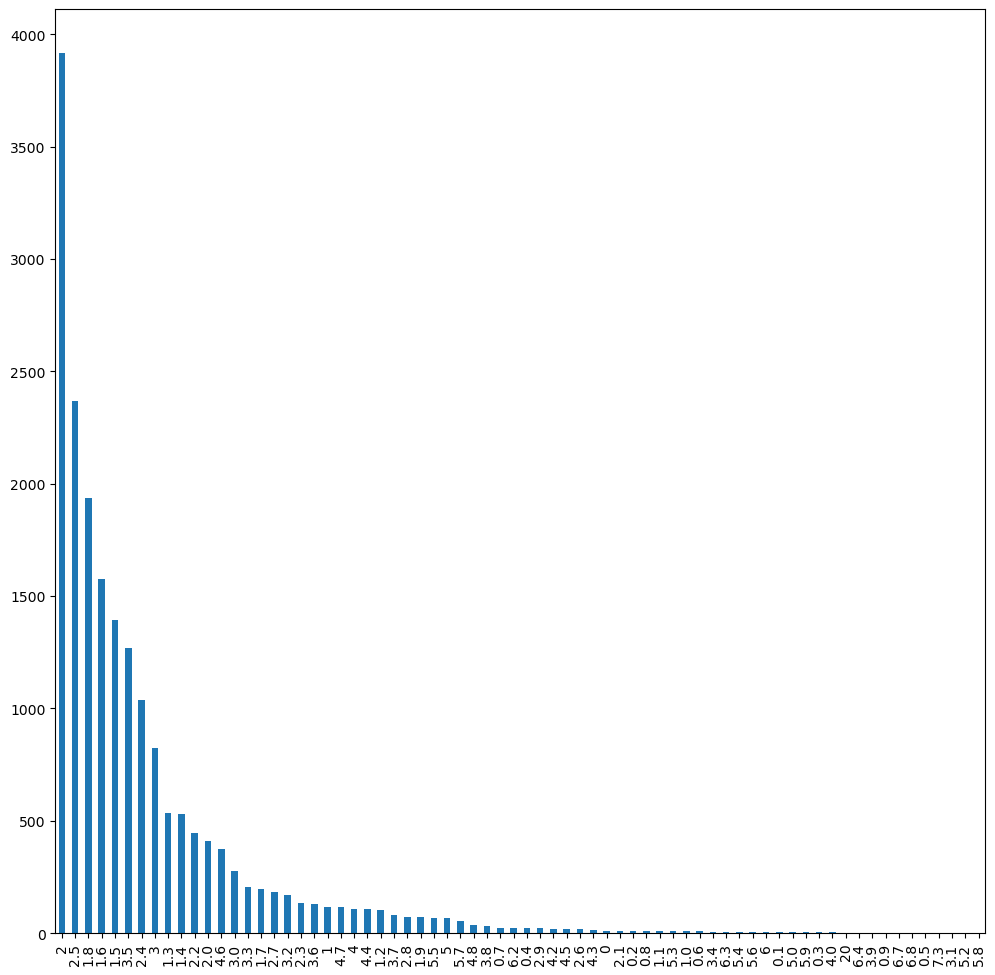

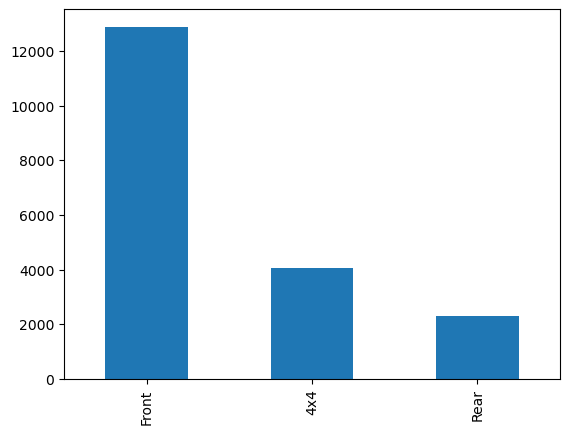

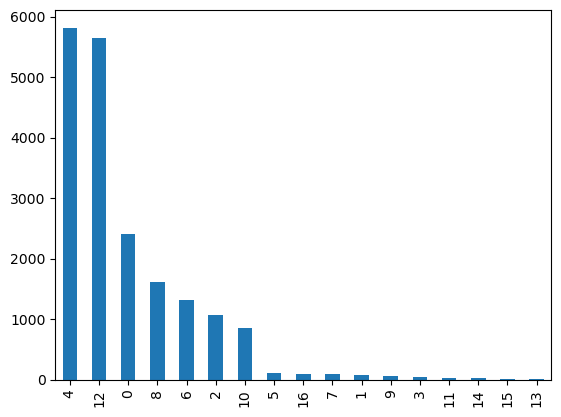

In [13]:
# plot a pie charof the car brands
visualize_data(df)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  turbo             19237 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object

# Questions

## 1. What is the distribution of car prices in the dataset?

count     19237.000000
mean      18857.837369
std       17408.124746
min         178.500000
25%        9095.000000
50%       14269.000000
75%       22947.000000
max      308906.000000
Name: Price, dtype: float64


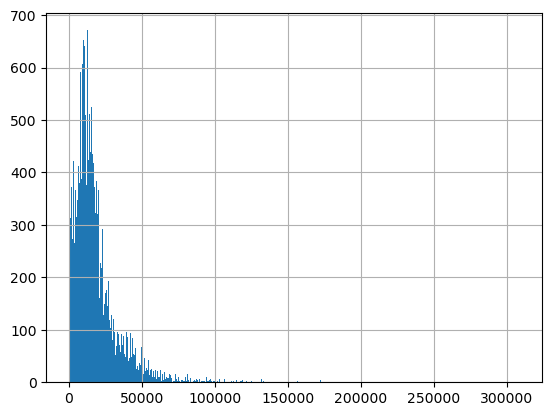

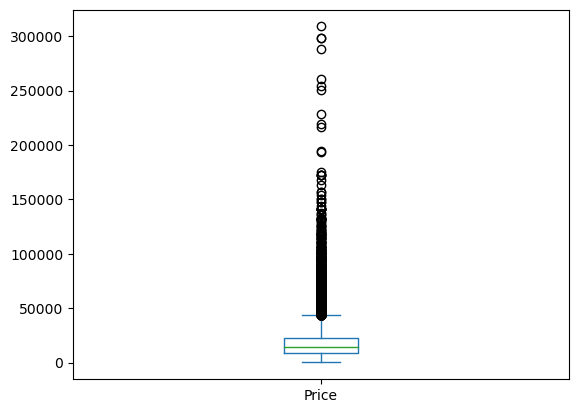

In [17]:
# 1.What is the distribution of car prices in the dataset?
print(df['Price'].describe())
# plot the distribution of the price
df['Price'].hist(bins=500)
plt.show()
df['Price'].plot(kind='box')
plt.show()


## 2. What is the most common car brand in the dataset?

Top Manufacturer:  HYUNDAI


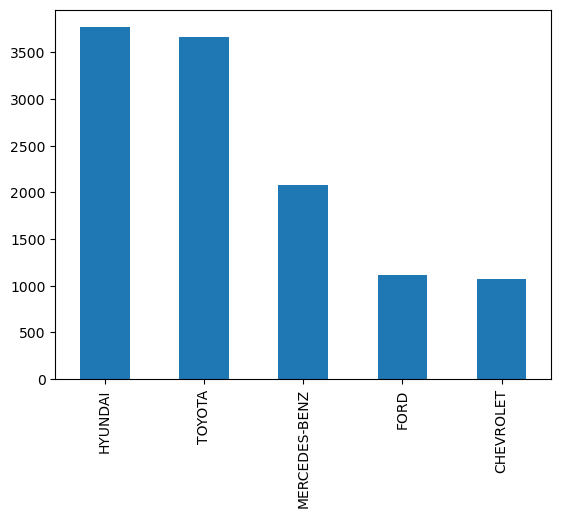

-------------------------------------------------------

Top Model:  Prius


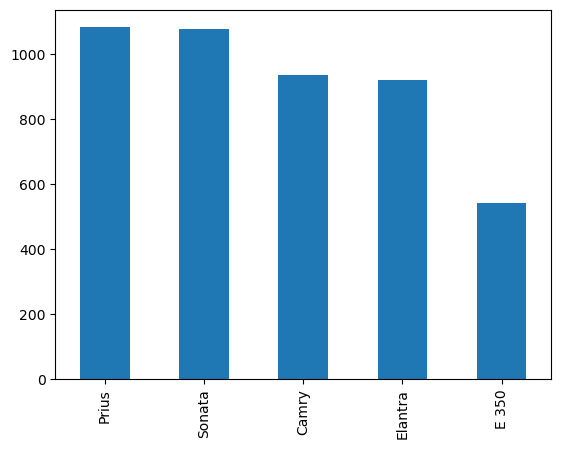

In [18]:
# 2. What is the most common car brand in the dataset?
print("Top Manufacturer: ", df['Manufacturer'].value_counts().idxmax())
df['Manufacturer'].value_counts().head(5).plot(kind='bar')
plt.show()

print("-------------------------------------------------------\n")

print("Top Model: ", df['Model'].value_counts().idxmax())
df['Model'].value_counts().head(5).plot(kind='bar')
plt.show()

## 3. What is the relationship between car prices and the number of cylinders in the engine?
## 4. What is the relationship between car prices and the mileage?
## 5. What is the relationship between car prices and the year of manufacture?

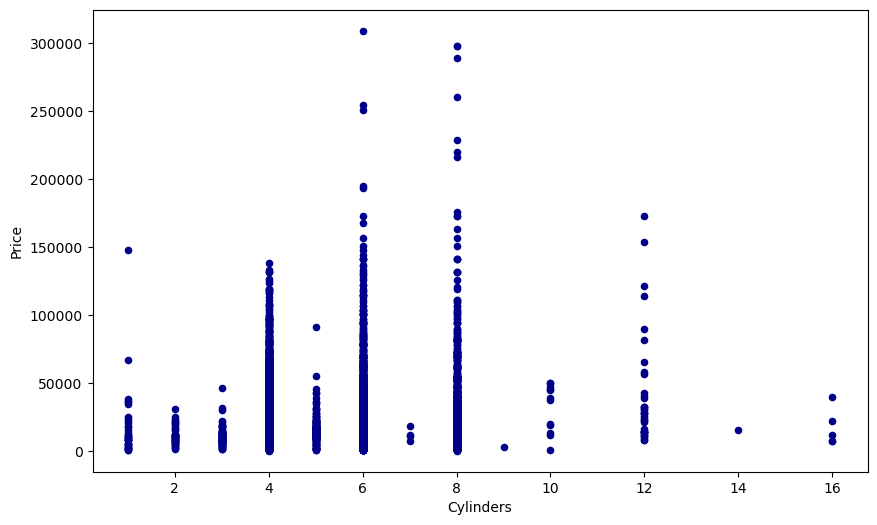

The correlation between Cylinders and Price is:  0.15600840175540806
The correlation is positive, but not very strong. This means that the number of cylinders in the engine has a weak impact on the price of the car.


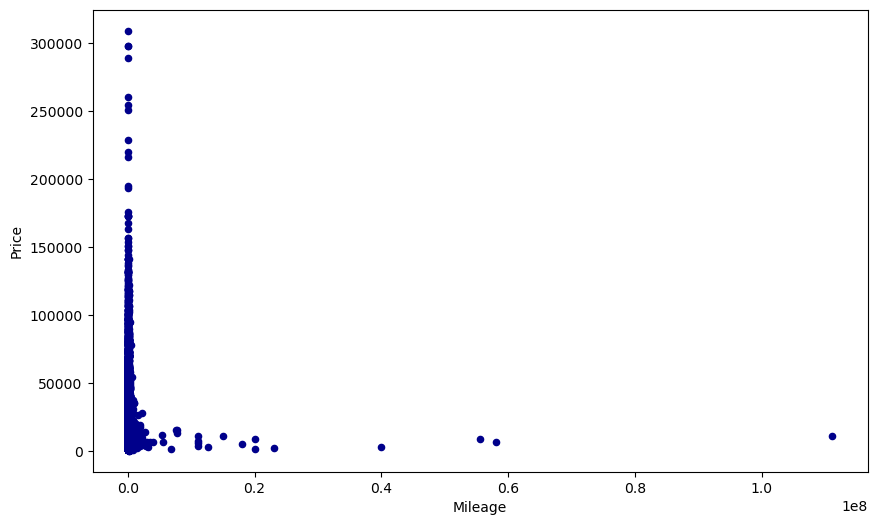

The correlation between Mileage and Price is:  -0.03485695421138315
The correlation is negative and relatively strong. This means that the mileage of the car has a strong impact on the price of the car


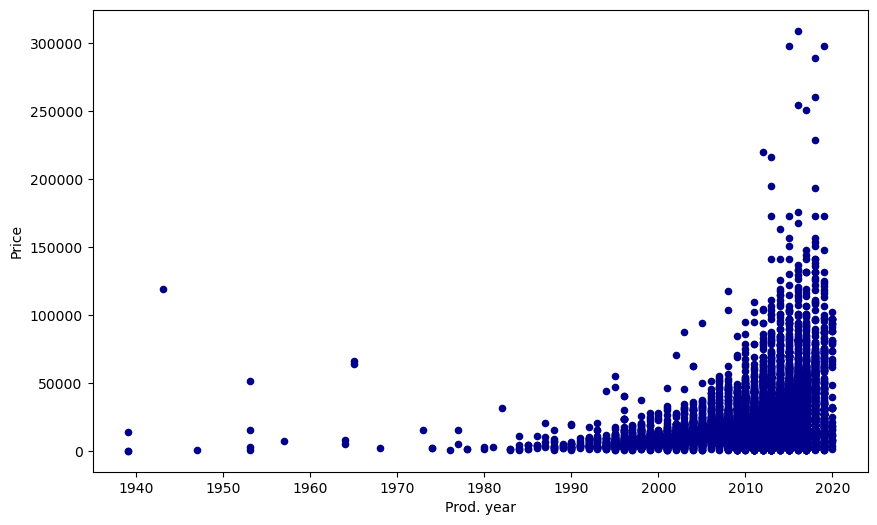

The correlation between Prod. year and Price is:  0.32866312101837447
The correlation is positive and relatively strong. This means that the year of manufacture of the car has a strong impact on the price of the car


In [19]:
# 3. What is the relationship between car prices and the number of cylinders in the engine?
# plot the relationship between the price and the number of cylinders
df.plot(kind='scatter', x='Cylinders', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Cylinders and Price is: ", df['Cylinders'].corr(df['Price']))
print("The correlation is positive, but not very strong. This means that the number of cylinders in the engine has a weak impact on the price of the car.")
# 4. What is the relationship between car prices and the mileage?
# plot the relationship between the price and the mileage
df.plot(kind='scatter', x='Mileage', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Mileage and Price is: ", df['Mileage'].corr(df['Price']))
print("The correlation is negative and relatively strong. This means that the mileage of the car has a strong impact on the price of the car")

# 5. What is the relationship between car prices and the year of manufacture?
# plot the relationship between the price and the year of manufacture
df.plot(kind='scatter', x='Prod. year', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Prod. year and Price is: ", df['Prod. year'].corr(df['Price']))
print("The correlation is positive and relatively strong. This means that the year of manufacture of the car has a strong impact on the price of the car")




## 6. Is there a significant difference in car prices between cars with different numbers of cylinders in the engine?

Cylinders:  6.0
Mean:  19276.170846328274
Median:  13000.0
-------------------------------------------------------

Cylinders:  4.0
Mean:  17930.755461738474
Median:  14167.380952380952
-------------------------------------------------------

Cylinders:  8.0
Mean:  31782.186984342145
Median:  25089.0
-------------------------------------------------------

Cylinders:  1.0
Mean:  17317.763441382773
Median:  9722.0
-------------------------------------------------------

Cylinders:  12.0
Mean:  40896.24887892377
Median:  27754.5
-------------------------------------------------------

Cylinders:  3.0
Mean:  9957.453271028038
Median:  8467.0
-------------------------------------------------------

Cylinders:  2.0
Mean:  11302.141563826352
Median:  10243.0
-------------------------------------------------------

Cylinders:  16.0
Mean:  17519.8
Median:  11604.0
-------------------------------------------------------

Cylinders:  5.0
Mean:  15630.043301686874
Median:  14113.0
---------------

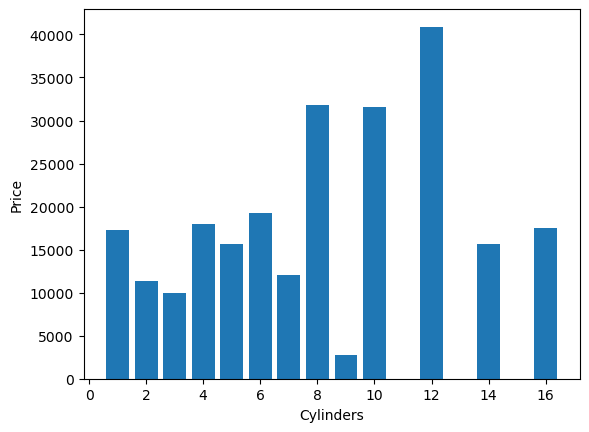

Conclusion: Yes, there is a significant difference in car prices between cars with different numbers of cylinders in the engine.


In [20]:
# 6. Is there a significant difference in car prices between cars with different numbers of cylinders in the engine?

means = []
vs = []
for v in df['Cylinders'].unique():
    print("Cylinders: ", v)
    print("Mean: ", df[df['Cylinders'] == v]['Price'].mean())
    print("Median: ", df[df['Cylinders'] == v]['Price'].median())
    means.append(df[df['Cylinders'] == v]['Price'].mean())
    vs.append(v)
    print("-------------------------------------------------------\n")


# plot the means of the prices of the cars with different number of cylinders
plt.bar(vs, means)
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.show()

# Conclusion
print("Conclusion: Yes, there is a significant difference in car prices between cars with different numbers of cylinders in the engine.")


## 7. Can we predict the price of a car based on its features?

In [74]:
# 7. Can we predict the price of a car based on its features?
# 7.1. Data prepraration

X=df.drop(['Price','ID'], axis=1)
y=df['Price']
# convert engine volume to float
X['Engine volume'] = X['Engine volume'].apply(lambda x: x.split()[0])
X['Engine volume'] = X['Engine volume'].astype(float)
# impute the missing values in the levy column with the mean
X['Levy'] = X['Levy'].replace('', np.nan)
X['Levy'] = X['Levy'].astype(float)
X['Levy'] = X['Levy'].fillna(X['Levy'].mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

# log transforming the target variable to make it more normally distributed
Y= np.log(y)

X= df_final

# 7.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [75]:
# 7.3. Building the model
# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]


# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))

Selected features:  Index(['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Manufacturer_AUDI', 'Manufacturer_BMW',
       'Manufacturer_CHEVROLET', 'Manufacturer_DAEWOO', 'Manufacturer_DODGE',
       'Manufacturer_FORD', 'Manufacturer_HONDA', 'Manufacturer_HYUNDAI',
       'Manufacturer_JAGUAR', 'Manufacturer_JEEP', 'Manufacturer_KIA',
       'Manufacturer_LAND ROVER', 'Manufacturer_LEXUS', 'Manufacturer_MAZDA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_MINI',
       'Manufacturer_MITSUBISHI', 'Manufacturer_NISSAN',
       'Manufacturer_PORSCHE', 'Manufacturer_ROLLS-ROYCE',
       'Manufacturer_SUBARU', 'Manufacturer_SUZUKI', 'Manufacturer_TOYOTA',
       'Manufacturer_VOLKSWAGEN', 'Model_328', 'Model_535 M', 'Model_911',
       'Model_A4', 'Model_A6', 'Model_Accent', 'Model_Avalon', 'Model_B-MAX',
       'Model_Camry', 'Model_Captiva', 'Model_Civic', 'Model_Cooper S Cabrio',
       'Model_Corolla', 'Model_Corolla 140', 'Model_Cruze', 'Model_E

## 8. Can we predict the engine volume of a car based on its features?

In [76]:
# 8. Can we predict the engine volume of a car based on its features?
# 8.1. Data prepraration
X=df.drop(['Engine volume','ID'], axis=1)
y=df['Engine volume']
# convert engine volume to float
y = y.apply(lambda x: x.split()[0])
y = y.astype(float)
# impute the missing values in the levy column with the mean
X['Levy'] = X['Levy'].replace('', np.nan)
X['Levy'] = X['Levy'].astype(float)
X['Levy'] = X['Levy'].fillna(X['Levy'].mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

Y= y
X= df_final

# 8.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [77]:
# 8.3. Building the model

# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]

# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))

Selected features:  Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Manufacturer_BMW', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HONDA', 'Manufacturer_HYUNDAI', 'Manufacturer_LEXUS',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_NISSAN',
       'Manufacturer_TOYOTA', 'Manufacturer_VAZ', 'Model_A4', 'Model_CLS 550',
       'Model_Camry', 'Model_E 350', 'Model_Elantra',
       'Model_GLC 300 GLC coupe', 'Model_GLS 63 AMG', 'Model_Genesis',
       'Model_H1', 'Model_Ipsum', 'Model_Jetta', 'Model_LS 460',
       'Model_M6 Gran cupe', 'Model_Prius', 'Model_Sonata', 'Model_Tundra',
       'Category_Coupe', 'Category_Hatchback', 'Category_Jeep',
       'Category_Minivan', 'Category_Sedan', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Petrol',
       'Gear box type_Manual', 'Gear box type_Tiptronic', 'Drive wheels_Front',
       'Drive wheels_Rear'],
      dtype='object')
MSE: 0.08
RMSE: 0.29
A

## 9. Can we predict the levy of a car based on its features?

In [79]:
# 9. Can we predict the levy of a car based on its features?
# 9.1. Data prepraration

X=df.drop(['Levy','ID'], axis=1)
y=df['Levy']
# convert engine volume to float
X['Engine volume'] = X['Engine volume'].apply(lambda x: x.split()[0])
X['Engine volume'] = X['Engine volume'].astype(float)
# impute the missing values in the levy column with the mean
y = y.replace('', np.nan)
y = y.astype(float)
y = y.fillna(y.mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

# log transforming the target variable to make it more normally distributed
Y= np.log(y)

X= df_final

# 7.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)


X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [80]:
# 9.3. Building the model
# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]


# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))


Selected features:  Index(['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HONDA', 'Manufacturer_HYUNDAI', 'Manufacturer_LEXUS',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_NISSAN',
       'Manufacturer_TOYOTA', 'Manufacturer_VOLKSWAGEN', 'Model_320 M',
       'Model_520', 'Model_Alphard', 'Model_Aqua', 'Model_C 43 AMG',
       'Model_C-MAX', 'Model_CHR', 'Model_CL 500', 'Model_Cherokee',
       'Model_E 300 AVANTGARDE-LTD', 'Model_E 500 AVG', 'Model_Elantra',
       'Model_Elysion', 'Model_Escape', 'Model_FIT', 'Model_Fred',
       'Model_Fusion', 'Model_Insight', 'Model_Land Cruiser 80',
       'Model_Legacy', 'Model_Note', 'Model_Prius', 'Model_Prius C',
       'Model_RX 450', 'Model_Volt', 'Model_X5 4.8is', 'Category_Coupe',
       'Category_Hatchback', 'Category_Jeep', 'Category_Minivan',
       'Category_Sedan', 'Category_Universal', 'Leather interior_Yes',
       'Fuel ty